## Libraries

In [1]:
import pandas as pd

## Kaggle Data Download

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [2]:
# download single file
#Signature: dataset_download_file(dataset, file_name, path=None, force=False, quiet=True)
api.dataset_download_file('airqualityanthony/uk-defra-aurn-air-quality-data-2015-2023','AURN_2015_2023.csv',quiet=False)

100%|██████████| 335M/335M [00:08<00:00, 42.0MB/s] 

True

## Data Prep

In [2]:
df = pd.read_csv('AURN_2015_2023_daily.csv',index_col=0)

In [3]:
df.head()

,site,code,date,nox,no2,no,ws,wd,air_temp,o3,pm10,pm2.5,v10,nv10,so2,co,v2.5,nv2.5,latitude,longitude
1,Aberdeen Erroll Park,ABD9,2021-10-01,21.777138,13.867139,5.158767,NaN,NaN,NaN,46.098502,4.804348,2.362565,NaN,NaN,NaN,NaN,NaN,NaN,57.1574,-2.09477
2,Aberdeen Erroll Park,ABD9,2021-10-02,22.140919,17.500276,3.026549,NaN,NaN,NaN,52.394055,11.848958,5.502167,NaN,NaN,NaN,NaN,NaN,NaN,57.1574,-2.09477
3,Aberdeen Erroll Park,ABD9,2021-10-03,12.363808,8.389862,2.591740,NaN,NaN,NaN,53.182634,3.206250,1.649000,NaN,NaN,NaN,NaN,NaN,NaN,57.1574,-2.09477
4,Aberdeen Erroll Park,ABD9,2021-10-04,31.277229,19.291088,7.817158,NaN,NaN,NaN,39.587621,5.098958,2.468500,NaN,NaN,NaN,NaN,NaN,NaN,57.1574,-2.09477
5,Aberdeen Erroll Park,ABD9,2021-10-05,20.561104,13.963017,4.303160,NaN,NaN,NaN,38.662531,5.136458,2.605292,NaN,NaN,NaN,NaN,NaN,NaN,57.1574,-2.09477


##### Subset Columns interested in

In [17]:
## select columns
data = df[['site','code','date','no2','ws','wd','air_temp']]

In [18]:
## drop NAs
data = data.dropna()

In [6]:
data.head()

,site,code,date,no2,ws,wd,air_temp
9,Aberdeen Erroll Park,ABD9,2021-10-09,18.043852,4.570833,218.398145,11.845833
10,Aberdeen Erroll Park,ABD9,2021-10-10,12.336299,4.241667,280.074205,8.329167
11,Aberdeen Erroll Park,ABD9,2021-10-11,19.651871,3.983333,289.598589,8.704167
12,Aberdeen Erroll Park,ABD9,2021-10-12,11.592221,2.583333,352.022606,7.925000
13,Aberdeen Erroll Park,ABD9,2021-10-13,16.781942,3.237500,261.843093,10.816667


In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data['month'] = data['date'].dt.to_period('M')


In [13]:
data.dtypes

site         object
code         object
date         object
no2         float64
ws          float64
wd          float64
air_temp    float64
dtype: object

## Modelling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## split data
X = data[['ws','wd','air_temp']]
y = data['no2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## fit model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

Coefficients: 
 [-2.57313224e+00 -9.68084685e-04 -9.76584006e-01]
Mean squared error: 200.84
Coefficient of determination: 0.21


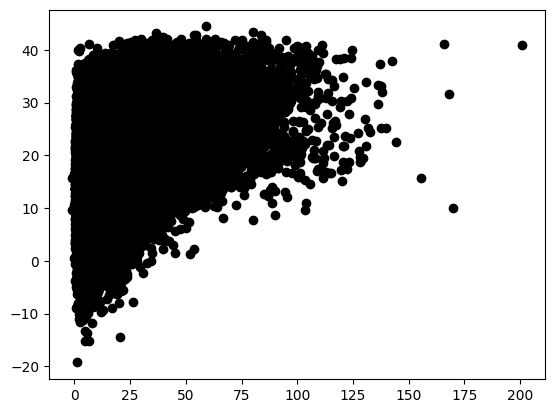

In [21]:
## predict
y_pred = model.predict(X_test)

## evaluate
print('Coefficients: \n', model.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

## plot
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred,  color='black')
# plt.plot(y_test, y_test, color='blue', linewidth=3)
